## Random Sample Imputation

Aim: Random Sample imputation consist of taking random observation from the dataset and we use this observation to replace the NaN values.

When should it be used? it assumes that the data are missing completely at random(MCAR)


In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
df['Age'].sample()

366    60.0
Name: Age, dtype: float64

In [36]:
def imput_nan(df,variable,median):
    df[variable+'_Median']=df[variable].fillna(median)
    df[variable+'_Random']=df[variable]
    #it will have the random sample to fill the NaN values
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_Random']=random_sample

In [37]:
median=df.Age.median()

In [38]:
median

28.0

In [39]:
imput_nan(df,"Age",median)

In [32]:
df.head()

,Survived,Age,Fare,Age_Median,Age_Random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [40]:
df['Age_Random'].isnull().sum()

0

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

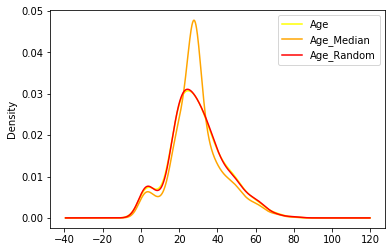

In [45]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax, color='yellow')
df['Age_Median'].plot(kind='kde',ax=ax, color='orange')
df['Age_Random'].plot(kind='kde',ax=ax, color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages
1.Easy to implement
2.There is less distrotion in variance

### Disadvantages
1.Every situation randomness wont work

## 3. Capturing NaN values with a new feature

it works well if the data are not missing completely at random 



In [47]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [50]:
import numpy as np
df['Age_NaN']=np.where(df['Age'].isnull(),1,0)

In [51]:
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [52]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [53]:
df.head(50)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# Advantages
1.Easy to implement
2.captures the importance of missing values 

# Disadvatages
Creating Additional Feature(Curse of Dimensionality) 

## 3. End of Distribution imputation


In [55]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


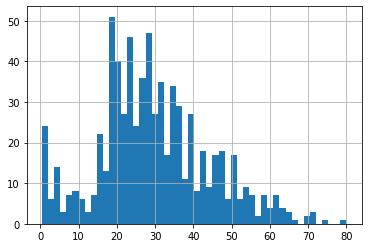

In [58]:
df.Age.hist(bins=50)

In [61]:
extreme=df.Age.mean()+3*df.Age.std()

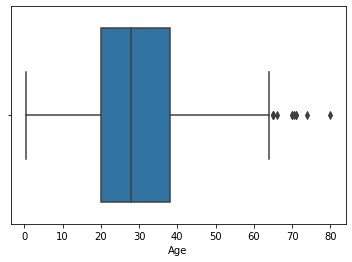

In [62]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [63]:
def imput_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [64]:
imput_nan(df,'Age',df.Age.median(),extreme)

In [66]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


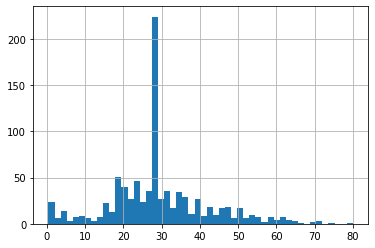

In [68]:
df['Age'].hist(bins=50)

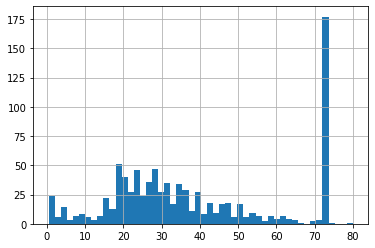

In [69]:
df['Age_end_distribution'].hist(bins=50)

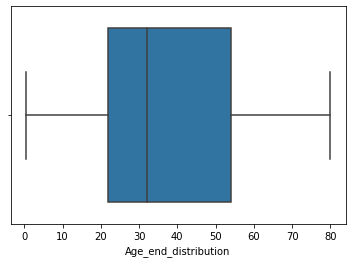

In [70]:
sns.boxplot('Age_end_distribution',data=df)

In [ ]:
## Advantages

1. Easy to implement
2.Capture the importance of missingess if there is one

## Disadvantages

1. Distrost the original distribution of the variable